<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/Visualising_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualizing a Convolutional Neural Network (CNN**) **bold text** helps in understanding how the network processes and extracts features from input data. Here's how you can visualize a CNN:

1. Visualize the Architecture:

Use a visualization tool like Netron or TensorBoard to display the network structure.
This shows the layers, their connections, and the flow of data through the network.
2. Visualize the Filters:

Display the filters in each convolutional layer.
This helps in understanding the specific features that the network is looking for in the input data.
3. Visualize Feature Maps:

After each convolutional layer, there are feature maps that represent the extracted features.
Visualize these feature maps to see how the network transforms the input data.
4. Visualize Class Activations:

Use techniques like GradCAM or Guided Backpropagation to highlight the regions in the input data that contribute the most to the predicted class.
This helps in understanding the network's decision-making process.
5. Visualize Filters Over Time:

Train the network on a dataset and visualize the changes in the filters over time.
This shows how the network learns and adapts to the data.
6. Use TensorBoard:

TensorBoard is a powerful tool for visualizing CNNs and other deep learning models.
It provides visualizations for various aspects of the network, including weights, gradients, and activations.
7. Use Custom Visualization Tools:

You can also create your own visualization tools using libraries like Matplotlib or PyTorch.
This gives you more control over the visualization and allows you to customize it for your specific needs.
By visualizing a CNN, you gain valuable insights into its inner workings, which can help you debug, improve, and interpret the network's behavior.

In [1]:
from keras.applications.vgg16 import VGG16
model= VGG16()

553467096/553467096 [==============================] - 7s 0us/step


# VGG16
Overview:

VGG16 is a convolutional neural network (CNN) architecture named after the Visual Geometry Group at Oxford University.
It was proposed by Karen Simonyan and Andrew Zisserman in their 2014 paper, "Very Deep Convolutional Networks for Large-Scale Image Recognition".
VGG16 is a 16-layer CNN that uses only 3x3 convolutions and 2x2 max pooling operations.
It was one of the first CNNs to achieve state-of-the-art results on the ImageNet classification task.
Architecture:

The VGG16 architecture consists of five blocks of convolutional layers, each followed by a max pooling layer.
Each convolutional layer uses a 3x3 kernel size and a padding of 1 to maintain the input size.
The number of filters doubles in each block, starting with 64 in the first block and ending with 512 in the last block.
The final layers consist of three fully connected layers with 4096, 4096, and 1000 neurons, respectively.
The output layer is a softmax layer that predicts the probability of each class.
Training:

VGG16 was trained on the ImageNet dataset, which consists of over 14 million images belonging to 1000 different classes.
The network was trained using stochastic gradient descent with a learning rate of 0.01 and a momentum of 0.9.
The network was trained for 370 epochs, with a batch size of 256.
Performance:

VGG16 achieved a top-5 error rate of 7.3% on the ImageNet validation set, which was state-of-the-art at the time.
VGG16 has been used successfully for a variety of tasks, including image classification, object detection, and scene recognition.
Advantages:

VGG16 is a relatively simple architecture that is easy to understand and implement.
The network is computationally efficient and can be trained on a single GPU.
VGG16 has been shown to be effective for a wide range of computer vision tasks.
Disadvantages:

VGG16 is a large network that requires a large amount of training data.

In [2]:
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

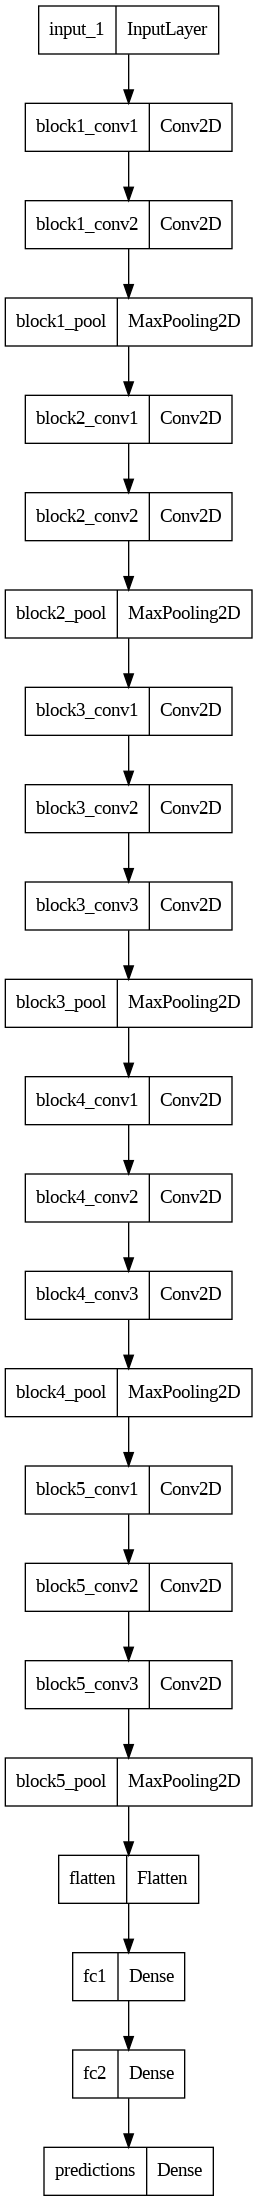

In [4]:
from keras.utils import plot_model
plot_model(model)

In [6]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters,biases=model.layers[i].get_weights()
  print('layer number',i,model.layers[i].name,filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [7]:
filter,bias=model.layers[1].get_weights()#2nd layer

In [8]:
#normalize
f_min,f_max=filters.min(),filter.max()
filters=(filters-f_min)/(f_max - f_min)

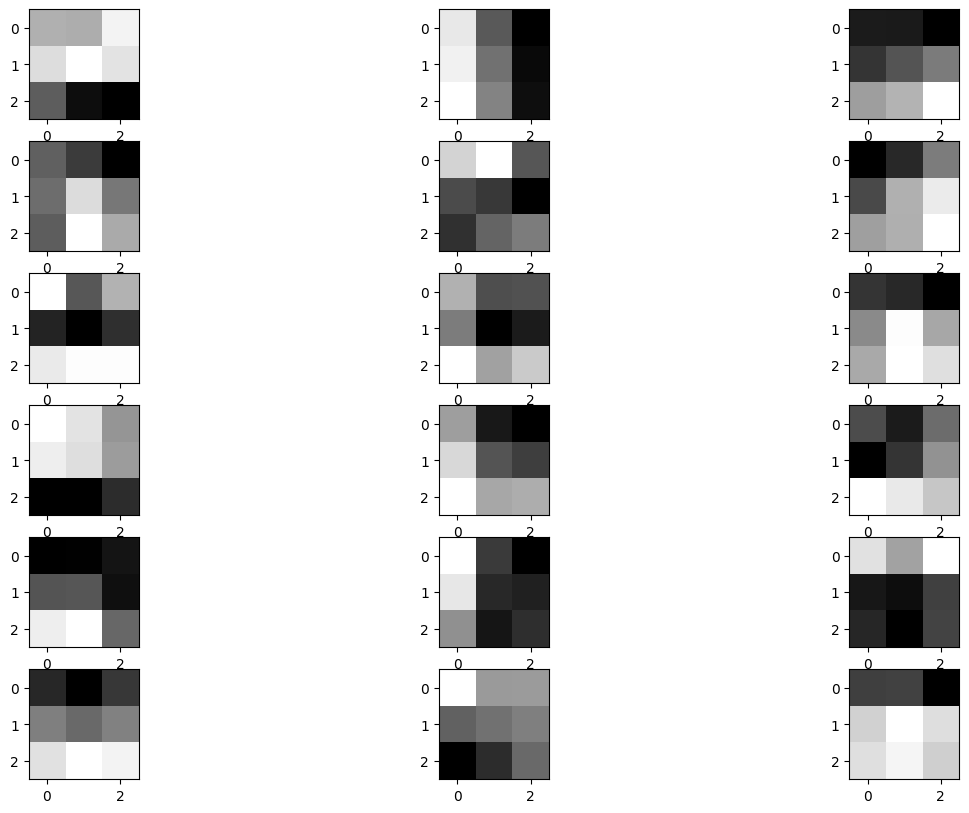

In [9]:
import matplotlib
n_filters=6
ix=1
fig=pyplot.figure(figsize=(15,10))
for i in range(n_filters):
  f=filters[:,:,:,i]
  for j in range(3):
    pyplot.subplot(n_filters,3,ix)
    pyplot.imshow(f[:,:,j],cmap='gray')
    ix+=1
pyplot.show()

In [10]:
for i in range(len(model.layers)):
  layer=model.layers[i]
  if 'conv' not in layer.name:
    continue
  print(i,layer.name,layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
